In [ ]:
!git clone https://github.com/Khumayun/NewUU-MatrixElectricity

Cloning into 'NewUU-MatrixElectricity'...
remote: Enumerating objects: 2025, done.
remote: Counting objects: 100% (2025/2025), done.
remote: Compressing objects: 100% (1987/1987), done.
remote: Total 2025 (delta 43), reused 1983 (delta 19), pack-reused 0
Receiving objects: 100% (2025/2025), 22.29 MiB | 22.62 MiB/s, done.
Resolving deltas: 100% (43/43), done.


Hour 0: MSE = 1143.972373136297, RMSE = 33.82266064543558, R^2 = 0.12608367772458184
Hour 1: MSE = 1293.8319599231434, RMSE = 35.9698757284918, R^2 = 0.15324571971088174
Hour 2: MSE = 1479.116217877235, RMSE = 38.45927999686467, R^2 = 0.16671843350334847
Hour 3: MSE = 1358.967408681371, RMSE = 36.86417513903398, R^2 = 0.157553972400868
Hour 4: MSE = 1071.34087751516, RMSE = 32.73134396133406, R^2 = 0.15602620210780183
Hour 5: MSE = 1022.2922508694187, RMSE = 31.973305285337933, R^2 = 0.15253280482615028
Hour 6: MSE = 1662.8398285109263, RMSE = 40.777933107391874, R^2 = 0.18516786015970588
Hour 7: MSE = 2182.839861025112, RMSE = 46.72087179222057, R^2 = 0.2051422548891063
Hour 8: MSE = 2625.6139314529732, RMSE = 51.24074483702372, R^2 = 0.26604760881386746
Hour 9: MSE = 2443.7473862889674, RMSE = 49.43427339699621, R^2 = 0.30243632120466657
Hour 10: MSE = 2370.2498295059913, RMSE = 48.68521160995391, R^2 = 0.27969161407731424
Hour 11: MSE = 2487.0390853300355, RMSE = 49.87022243112653, 

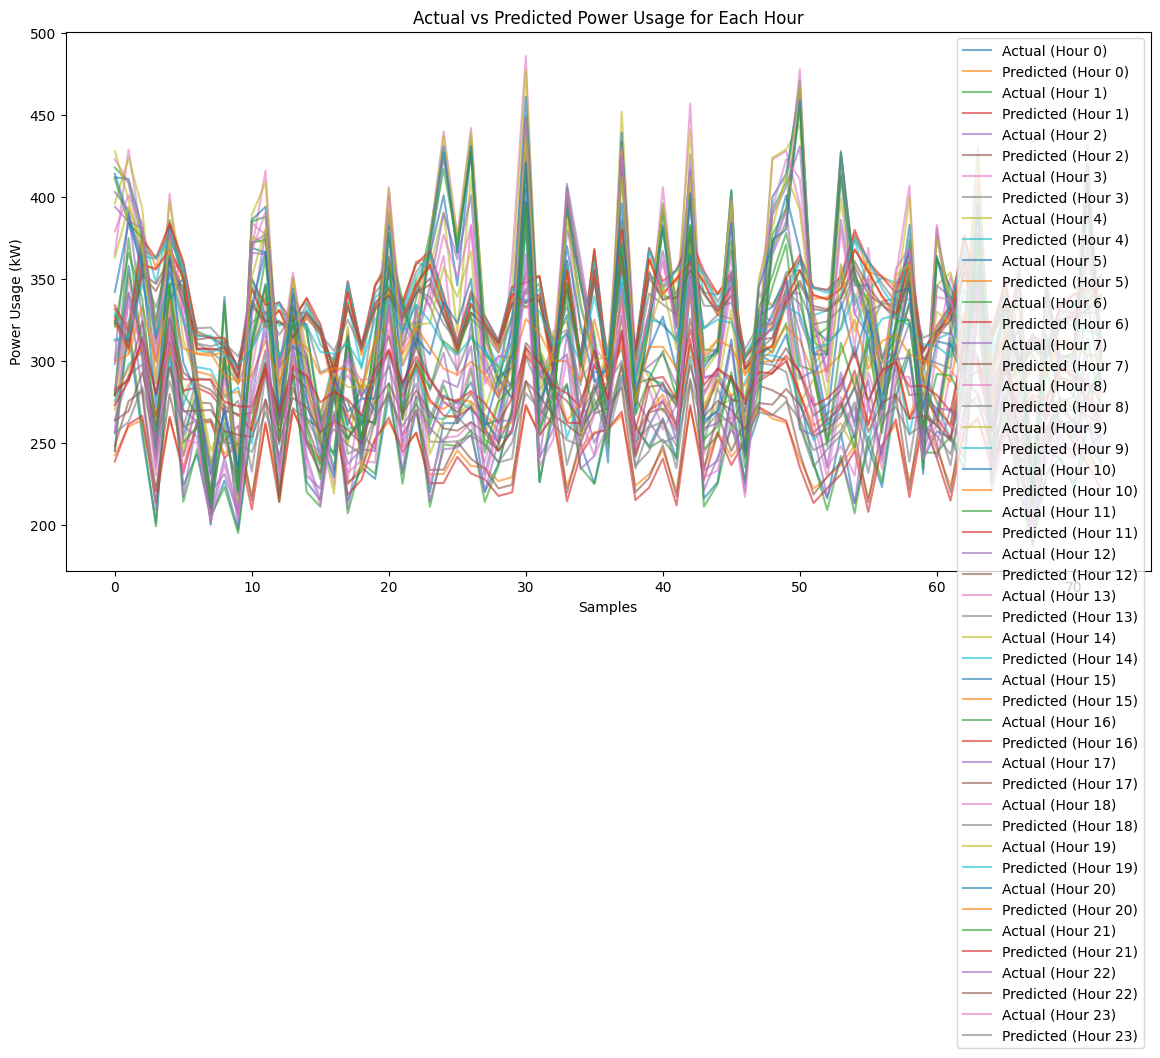

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data
df = pd.read_csv('juyo_shikoku_2023.csv')

# Ensure the DataFrame is structured properly
df['Date'] = pd.to_datetime(df['DATE'])
df['Hour'] = df['TIME'].str.split(':').str[0].astype(int)
df['Power'] = df['(kW)']

# Drop the original TIME and kW columns as they are now split into Hour and Power
df = df.drop(columns=['TIME', '(kW)'])

# Extract more features from the Date
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['DayOfYear'] = df['Date'].dt.dayofyear

# Features to be used for prediction
features = ['DayOfWeek', 'Month', 'DayOfYear']

# Prepare a dictionary to store results
results = {}

for hour in range(24):
    # Filter data for the specific hour
    hour_df = df[df['Hour'] == hour]

    # Split the data into features (X) and target (y)
    X = hour_df[features]
    y = hour_df['Power']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store the result
    results[hour] = {
        'mse': mse,
        'rmse': rmse,
        'r2': model.score(X_test, y_test),
        'y_test': y_test,
        'y_pred': y_pred
    }

# Print results
for hour, metrics in results.items():
    print(f'Hour {hour}: MSE = {metrics["mse"]}, RMSE = {metrics["rmse"]}, R^2 = {metrics["r2"]}')

# Visualization
plt.figure(figsize=(14, 7))
for hour, metrics in results.items():
    plt.plot(metrics['y_test'].values, label=f'Actual (Hour {hour})', alpha=0.6)
    plt.plot(metrics['y_pred'], label=f'Predicted (Hour {hour})', alpha=0.6)

plt.legend()
plt.xlabel('Samples')
plt.ylabel('Power Usage (kW)')
plt.title('Actual vs Predicted Power Usage for Each Hour')
plt.show()


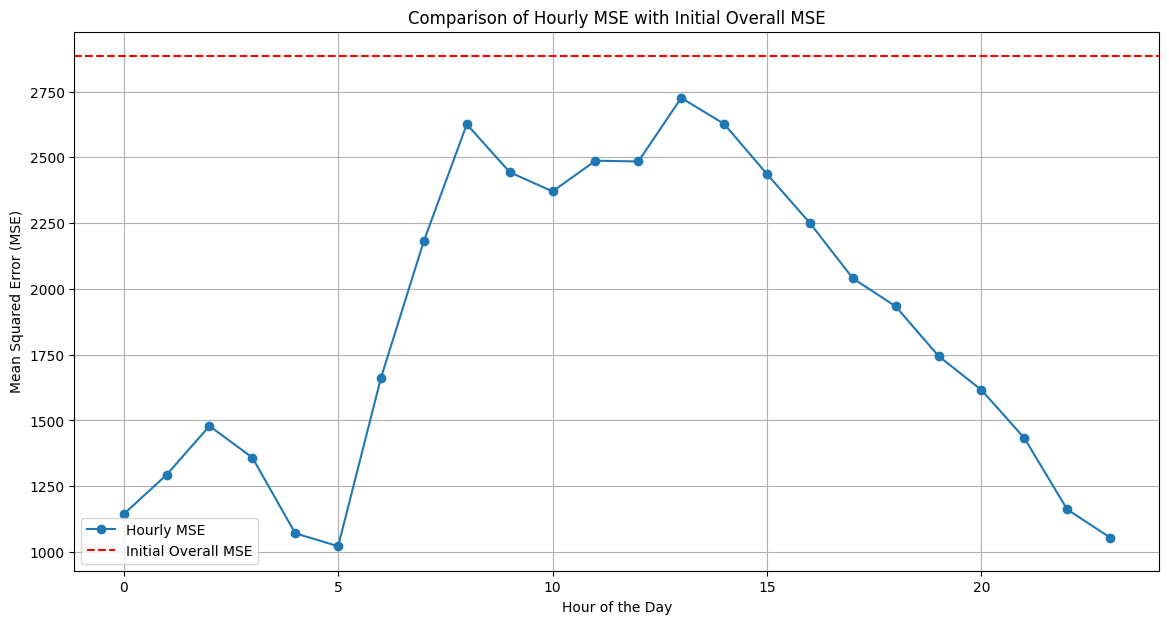

In [ ]:
import matplotlib.pyplot as plt

# Hourly MSE values from the results
hourly_mse = [1143.97, 1293.83, 1479.12, 1358.97, 1071.34, 1022.29, 1662.84, 2182.84,
              2625.61, 2443.75, 2370.25, 2487.04, 2484.31, 2725.75, 2626.91, 2436.28,
              2250.34, 2040.52, 1933.69, 1744.84, 1616.06, 1433.34, 1162.15, 1055.15]

# Plotting the hourly MSE values
plt.figure(figsize=(14, 7))
plt.plot(range(24), hourly_mse, marker='o', linestyle='-', label='Hourly MSE')
plt.axhline(y=2884.15, color='r', linestyle='--', label='Initial Overall MSE')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Hourly MSE with Initial Overall MSE')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

#New df
newDf = pd.read_csv('juyo_shikoku_2022.csv')

# Read the data
df = pd.read_csv('juyo_shikoku_2023.csv')

# Ensure the DataFrame is structured properly
df['Date'] = pd.to_datetime(df['DATE'])
df['Hour'] = df['TIME'].str.split(':').str[0].astype(int)
df['Power'] = df['(kW)']

# Drop the original TIME and kW columns as they are now split into Hour and Power
df = df.drop(columns=['TIME', '(kW)'])

# Extract more features from the Date
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['DayOfYear'] = df['Date'].dt.dayofyear

# Additional feature: lagged power usage (previous hour)
df['Lag1'] = df['Power'].shift(1)
df = df.dropna()  # Drop the first row with NaN due to the shift

# Features to be used for prediction
features = ['Hour', 'DayOfWeek', 'Month', 'DayOfYear', 'Lag1']

# Prepare a dictionary to store results
results = {}

for hour in range(24):
    # Filter data for the specific hour
    hour_df = df[df['Hour'] == hour]

    # Split the data into features (X) and target (y)
    X = hour_df[features]
    y = hour_df['Power']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store the result
    results[hour] = {
        'mse': mse,
        'rmse': rmse,
        'r2': model.score(X_test, y_test),
        'y_test': y_test,
        'y_pred': y_pred
    }

# Print results
for hour, metrics in results.items():
    print(f'Hour {hour}: MSE = {metrics["mse"]}, RMSE = {metrics["rmse"]}, R^2 = {metrics["r2"]}')


Hour 0: MSE = 12.301221917808205, RMSE = 3.50730978355323, R^2 = 0.9912398977650606
Hour 1: MSE = 11.132173972602743, RMSE = 3.336491266675629, R^2 = 0.9927144975142024
Hour 2: MSE = 4.943068493150686, RMSE = 2.2233012600974, R^2 = 0.9972152506966733
Hour 3: MSE = 7.434224657534254, RMSE = 2.7265774622288386, R^2 = 0.995391403067498
Hour 4: MSE = 8.295412328767137, RMSE = 2.8801757461597957, R^2 = 0.9934650951950703
Hour 5: MSE = 15.544569863013733, RMSE = 3.9426602520396976, R^2 = 0.987113750484963
Hour 6: MSE = 31.13441369863009, RMSE = 5.579822013167632, R^2 = 0.9847433766609704
Hour 7: MSE = 53.42830958904108, RMSE = 7.309467120730559, R^2 = 0.980544653575692
Hour 8: MSE = 125.10500273972602, RMSE = 11.18503476703251, R^2 = 0.9650287063112294
Hour 9: MSE = 113.21516712328773, RMSE = 10.640261609720305, R^2 = 0.9676829164433896
Hour 10: MSE = 80.13772602739725, RMSE = 8.951967718183374, R^2 = 0.9756465013233058
Hour 11: MSE = 54.15711780821918, RMSE = 7.3591519761599695, R^2 = 0.983

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Read the data
df = pd.read_csv('juyo_shikoku_2023.csv')

# Ensure the DataFrame is structured properly
df['Date'] = pd.to_datetime(df['DATE'])
df['Hour'] = df['TIME'].str.split(':').str[0].astype(int)
df['Power'] = df['(kW)']

# Drop the original TIME and kW columns as they are now split into Hour and Power
df = df.drop(columns=['TIME', '(kW)'])

# Extract more features from the Date
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['DayOfYear'] = df['Date'].dt.dayofyear

# Additional feature: lagged power usage (previous hour)
df['Lag1'] = df['Power'].shift(1)
df = df.dropna()  # Drop the first row with NaN due to the shift

# Features to be used for prediction
features = ['Hour', 'DayOfWeek', 'Month', 'DayOfYear', 'Lag1']

# Prepare a dictionary to store results
results = {}

for hour in range(24):
    # Filter data for the specific hour
    hour_df = df[df['Hour'] == hour]

    # Split the data into features (X) and target (y)
    X = hour_df[features]
    y = hour_df['Power']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = model.predict(X_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics for the training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate metrics for the test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store the result
    results[hour] = {
        'train_mse': train_mse,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_mse': test_mse,
        'test_rmse': test_rmse,
        'test_r2': test_r2
    }

# Print results
for hour, metrics in results.items():
    print(f'Hour {hour}:')
    print(f'  Train MSE = {metrics["train_mse"]}, Train RMSE = {metrics["train_rmse"]}, Train R^2 = {metrics["train_r2"]}')
    print(f'  Test MSE = {metrics["test_mse"]}, Test RMSE = {metrics["test_rmse"]}, Test R^2 = {metrics["test_r2"]}')
    print()

# Visualization of train vs test errors
train_rmse_values = [metrics['train_rmse'] for metrics in results.values()]
test_rmse_values = [metrics['test_rmse'] for metrics in results.values()]


Hour 0:
  Train MSE = 1.4595762886597945, Train RMSE = 1.2081292516365103, Train R^2 = 0.998831688209982
  Test MSE = 12.301221917808205, Test RMSE = 3.50730978355323, Test R^2 = 0.9912398977650606

Hour 1:
  Train MSE = 1.8880256849315096, Train RMSE = 1.3740544694194294, Train R^2 = 0.9987019978351556
  Test MSE = 11.132173972602743, Test RMSE = 3.336491266675629, Test R^2 = 0.9927144975142024

Hour 2:
  Train MSE = 1.540145890410956, Train RMSE = 1.241026144128703, Train R^2 = 0.9990733531385029
  Test MSE = 4.943068493150686, Test RMSE = 2.2233012600974, Test R^2 = 0.9972152506966733

Hour 3:
  Train MSE = 1.6621695205479483, Train RMSE = 1.289251535018651, Train R^2 = 0.998895016666531
  Test MSE = 7.434224657534254, Test RMSE = 2.7265774622288386, Test R^2 = 0.995391403067498

Hour 4:
  Train MSE = 1.5188767123287674, Train RMSE = 1.232427163092719, Train R^2 = 0.9986784023496211
  Test MSE = 8.295412328767137, Test RMSE = 2.8801757461597957, Test R^2 = 0.9934650951950703

Hour 5

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Read the data
df = pd.read_csv('juyo_shikoku_2022.csv')
newDf = pd.read_csv('juyo_shikoku_2023.csv')

# Function to preprocess the dataframe
def preprocess(df):
    df['Date'] = pd.to_datetime(df['DATE'])
    df['Hour'] = df['TIME'].str.split(':').str[0].astype(int)
    df['Power'] = df['(kW)']

    # Drop the original TIME and kW columns as they are now split into Hour and Power
    df = df.drop(columns=['TIME', '(kW)'])

    # Extract more features from the Date
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    df['DayOfYear'] = df['Date'].dt.dayofyear

    # Additional feature: lagged power usage (previous hour)
    df['Lag1'] = df['Power'].shift(1)
    df = df.dropna()  # Drop the first row with NaN due to the shift

    return df

# Preprocess both dataframes
df = preprocess(df)
newDf = preprocess(newDf)

# Features to be used for prediction
features = ['Hour', 'DayOfWeek', 'Month', 'DayOfYear', 'Lag1']

# Prepare a dictionary to store results
results = {}

for hour in range(24):
    # Filter data for the specific hour in both dataframes
    hour_df = df[df['Hour'] == hour]
    hour_newDf = newDf[newDf['Hour'] == hour]

    # Ensure there are data points for the specific hour
    if hour_df.empty or hour_newDf.empty:
        continue

    # Training data
    X_train = hour_df[features]
    y_train = hour_df['Power']

    # Testing data
    X_test = hour_newDf[features]
    y_test = hour_newDf['Power']

    # Initialize and train the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store the result
    results[hour] = {
        'mse': mse,
        'rmse': rmse,
        'r2': model.score(X_test, y_test),
        'y_test': y_test,
        'y_pred': y_pred
    }

# Print results
for hour, metrics in results.items():
    print(f'Hour {hour}: MSE = {metrics["mse"]}, RMSE = {metrics["rmse"]}, R^2 = {metrics["r2"]}')


Hour 0: MSE = 16.293262087912087, RMSE = 4.036491309034628, R^2 = 0.9874754453682578
Hour 1: MSE = 16.932974794520547, RMSE = 4.114969598249852, R^2 = 0.9886107482285107
Hour 2: MSE = 29.69634931506849, RMSE = 5.44943568776332, R^2 = 0.9826158523759574
Hour 3: MSE = 26.2169495890411, RMSE = 5.120248977251116, R^2 = 0.9830673395417874
Hour 4: MSE = 18.460989589041095, RMSE = 4.296625372200967, R^2 = 0.9844749900526807
Hour 5: MSE = 38.642178630136975, RMSE = 6.216283345387095, R^2 = 0.9641092032485338
Hour 6: MSE = 76.67817698630135, RMSE = 8.756607618610152, R^2 = 0.9563800451834141
Hour 7: MSE = 57.46739041095887, RMSE = 7.580724926480242, R^2 = 0.9762003137308246
Hour 8: MSE = 92.07943150684933, RMSE = 9.59580280679263, R^2 = 0.9728560341373619
Hour 9: MSE = 76.82916739726029, RMSE = 8.765224891425222, R^2 = 0.9786545728866
Hour 10: MSE = 54.07197479452054, RMSE = 7.353364862056047, R^2 = 0.9850536180805027
Hour 11: MSE = 43.96667945205479, RMSE = 6.630737474222214, R^2 = 0.988465694

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to preprocess the dataframe
def preprocess(df):
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['DATE'])
    df['Hour'] = df['TIME'].str.split(':').str[0].astype(int)
    df['Power'] = df['(kW)']

    # Drop the original TIME and kW columns as they are now split into Hour and Power
    df = df.drop(columns=['TIME', '(kW)'])

    # Extract more features from the Date
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    df['DayOfYear'] = df['Date'].dt.dayofyear

    # Additional feature: lagged power usage (previous hour)
    df['Lag1'] = df['Power'].shift(1)
    df = df.dropna()  # Drop the first row with NaN due to the shift

    return df

# Read the data for the years 2021 to 2024
df_2021 = preprocess(pd.read_csv('juyo_shikoku_2021.csv'))
df_2022 = preprocess(pd.read_csv('juyo_shikoku_2022.csv'))
df_2023 = preprocess(pd.read_csv('juyo_shikoku_2023.csv'))
df_2024 = preprocess(pd.read_csv('juyo_shikoku_2024.csv'))

# Combine data from 2021 to 2023 for training
train_df = pd.concat([df_2021, df_2022, df_2023])

# Use 2024 data for testing
test_df = df_2024

# Features to be used for prediction
features = ['Hour', 'DayOfWeek', 'Month', 'DayOfYear', 'Lag1']

# Prepare a dictionary to store results
results = {}

for hour in range(24):
    # Filter data for the specific hour in both dataframes
    hour_train_df = train_df[train_df['Hour'] == hour]
    hour_test_df = test_df[test_df['Hour'] == hour]

    # Ensure there are data points for the specific hour
    if hour_train_df.empty or hour_test_df.empty:
        continue

    # Training data
    X_train = hour_train_df[features]
    y_train = hour_train_df['Power']

    # Testing data
    X_test = hour_test_df[features]
    y_test = hour_test_df['Power']

    # Initialize and train the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store the result
    results[hour] = {
        'mse': mse,
        'rmse': rmse,
        'r2': model.score(X_test, y_test),
        'y_test': y_test,
        'y_pred': y_pred
    }

# Print results
for hour, metrics in results.items():
    print(f'Hour {hour}: MSE = {metrics["mse"]}, RMSE = {metrics["rmse"]}, R^2 = {metrics["r2"]}')


Hour 0: MSE = 10.343972592592591, RMSE = 3.2162046876081427, R^2 = 0.991347921134547
Hour 1: MSE = 13.185648529411766, RMSE = 3.6312048316518535, R^2 = 0.9901096305096805
Hour 2: MSE = 13.713043382352947, RMSE = 3.7031126613097998, R^2 = 0.9902310750370162
Hour 3: MSE = 10.038733088235306, RMSE = 3.1683959803401005, R^2 = 0.9912760278997725
Hour 4: MSE = 8.79960882352942, RMSE = 2.966413461324874, R^2 = 0.9905911519895074
Hour 5: MSE = 27.48699779411765, RMSE = 5.242804382591215, R^2 = 0.9739372532514512
Hour 6: MSE = 58.977066911764744, RMSE = 7.679652785885879, R^2 = 0.9701301740820429
Hour 7: MSE = 57.37076985294117, RMSE = 7.574349467310125, R^2 = 0.9797012663579227
Hour 8: MSE = 87.77737647058827, RMSE = 9.368958131542069, R^2 = 0.9759251158434777
Hour 9: MSE = 70.21148749999999, RMSE = 8.379229529019955, R^2 = 0.9786880787095407
Hour 10: MSE = 41.16312205882356, RMSE = 6.41584928585636, R^2 = 0.9853137692048425
Hour 11: MSE = 23.303549264705914, RMSE = 4.8273749869578095, R^2 = 0

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to preprocess the dataframe
def preprocess(df, lags):
    # Strip leading and trailing whitespace from column names
    df.columns = df.columns.str.strip()

    df['Date'] = pd.to_datetime(df['DATE'])
    df['Hour'] = df['TIME'].str.split(':').str[0].astype(int)
    df['Power'] = df['(kW)']

    # Drop the original TIME and kW columns as they are now split into Hour and Power
    df = df.drop(columns=['TIME', '(kW)'])

    # Extract more features from the Date
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    df['DayOfYear'] = df['Date'].dt.dayofyear

    # Create lag features
    for lag in range(1, lags + 1):
        df[f'Lag{lag}'] = df['Power'].shift(lag)

    df = df.dropna()  # Drop rows with NaN values due to shifts

    return df

# Number of lag features to create
num_lags = 2

# Read the data for the years 2021 to 2024
df_2021 = pd.read_csv('juyo_shikoku_2021.csv')
df_2022 = pd.read_csv('juyo_shikoku_2022.csv')
df_2023 = pd.read_csv('juyo_shikoku_2023.csv')
df_2024 = pd.read_csv('juyo_shikoku_2024.csv')

# Preprocess the data
df_2021 = preprocess(df_2021, num_lags)
df_2022 = preprocess(df_2022, num_lags)
df_2023 = preprocess(df_2023, num_lags)
df_2024 = preprocess(df_2024, num_lags)

# Combine data from 2021 to 2023 for training
train_df = pd.concat([df_2021, df_2022, df_2023])

# Use 2024 data for testing
test_df = df_2024

# Features to be used for prediction
features = ['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, num_lags + 1)]

# Prepare a dictionary to store results
results = {}

for hour in range(24):
    # Filter data for the specific hour in both dataframes
    hour_train_df = train_df[train_df['Hour'] == hour]
    hour_test_df = test_df[test_df['Hour'] == hour]

    # Ensure there are data points for the specific hour
    if hour_train_df.empty or hour_test_df.empty:
        continue

    # Training data
    X_train = hour_train_df[features]
    y_train = hour_train_df['Power']

    # Testing data
    X_test = hour_test_df[features]
    y_test = hour_test_df['Power']

    # Initialize and train the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store the result
    results[hour] = {
        'mse': mse,
        'rmse': rmse,
        'r2': model.score(X_test, y_test),
        'y_test': y_test,
        'y_pred': y_pred
    }

# Print results
for hour, metrics in results.items():
    print(f'Hour {hour}: MSE = {metrics["mse"]}, RMSE = {metrics["rmse"]}, R^2 = {metrics["r2"]}')


Hour 0: MSE = 10.379391111111126, RMSE = 3.2217062422125213, R^2 = 0.9913182957838631
Hour 1: MSE = 11.994401481481486, RMSE = 3.4632934443216743, R^2 = 0.9910465454129912
Hour 2: MSE = 10.66963529411765, RMSE = 3.2664407684998134, R^2 = 0.9923991441094125
Hour 3: MSE = 8.787795588235284, RMSE = 2.9644216279462143, R^2 = 0.9923631315963454
Hour 4: MSE = 7.732141911764698, RMSE = 2.780672924269357, R^2 = 0.9917325247630526
Hour 5: MSE = 22.45011544117645, RMSE = 4.738155278288846, R^2 = 0.9787131472996196
Hour 6: MSE = 49.79561250000001, RMSE = 7.056600633449509, R^2 = 0.9747802602818767
Hour 7: MSE = 48.35940220588235, RMSE = 6.9540924789567145, R^2 = 0.9828896382777584
Hour 8: MSE = 68.14707352941177, RMSE = 8.25512407716636, R^2 = 0.9813091599818283
Hour 9: MSE = 43.052263235294085, RMSE = 6.5614223484922904, R^2 = 0.9869319611630971
Hour 10: MSE = 29.692300735294097, RMSE = 5.449064207301479, R^2 = 0.9894063433571778
Hour 11: MSE = 20.721029411764714, RMSE = 4.552035743682678, R^2 =

Hour 0, Degree 1: Test MSE = 5.203521508048544, Test RMSE = 2.2811228612349104, Test R^2 = 0.9956475833570985
Hour 1, Degree 1: Test MSE = 10.494175219559256, Test RMSE = 3.2394714413865815, Test R^2 = 0.9921664185243837
Hour 2, Degree 1: Test MSE = 3.414720721715307, Test RMSE = 1.8478962962556387, Test R^2 = 0.997567414499475
Hour 3, Degree 1: Test MSE = 4.934281008566491, Test RMSE = 2.221324156571141, Test R^2 = 0.9957119559335765
Hour 4, Degree 1: Test MSE = 8.557060128397975, Test RMSE = 2.9252453108069374, Test R^2 = 0.9908504934958632
Hour 5, Degree 1: Test MSE = 15.215951212003139, Test RMSE = 3.9007629012800993, Test R^2 = 0.9855724700839616
Hour 6, Degree 1: Test MSE = 33.05621519613922, Test RMSE = 5.749453469342909, Test R^2 = 0.9832581807621524
Hour 7, Degree 1: Test MSE = 45.863111257899405, Test RMSE = 6.772230892246617, Test R^2 = 0.9837728675803479
Hour 8, Degree 1: Test MSE = 136.45068436015637, Test RMSE = 11.681210740336653, Test R^2 = 0.9625753861514683
Hour 9, De

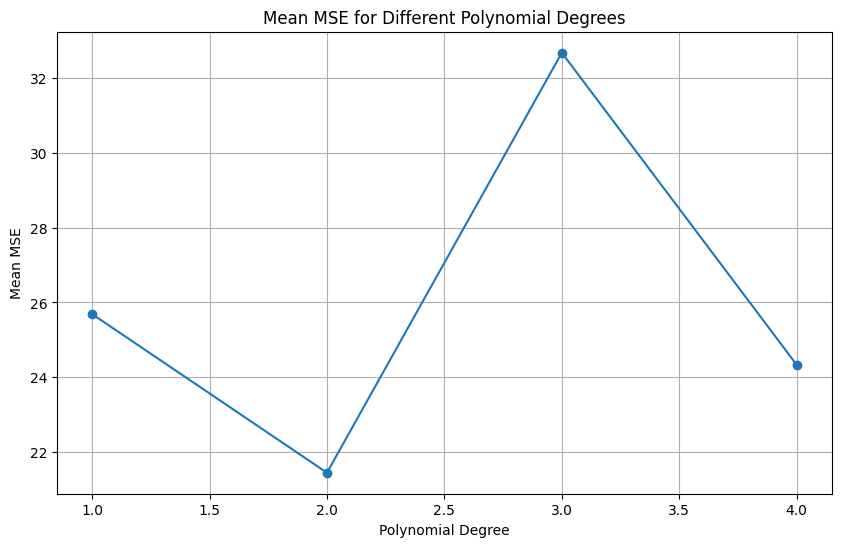

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the dataframe
def preprocess(df, lags):
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['DATE'])
    df['Hour'] = df['TIME'].str.split(':').str[0].astype(int)
    df['Power'] = df['(kW)']
    df = df.drop(columns=['TIME', '(kW)'])
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    df['DayOfYear'] = df['Date'].dt.dayofyear

    for lag in range(1, lags + 1):
        df[f'Lag{lag}'] = df['Power'].shift(lag)

    df = df.dropna()
    return df

# Number of lag features to create
num_lags = 2

# Read the data for the years 2021 to 2024
df_2021 = pd.read_csv('juyo_shikoku_2021.csv')
df_2022 = pd.read_csv('juyo_shikoku_2022.csv')
df_2023 = pd.read_csv('juyo_shikoku_2023.csv')
df_2024 = pd.read_csv('juyo_shikoku_2024.csv')

# Preprocess the data
df_2021 = preprocess(df_2021, num_lags)
df_2022 = preprocess(df_2022, num_lags)
df_2023 = preprocess(df_2023, num_lags)
df_2024 = preprocess(df_2024, num_lags)

# Combine data from 2021 to 2023 for training
train_df = pd.concat([df_2021, df_2022, df_2023])

# Use 2024 data for testing
test_df = df_2024

# Features to be used for prediction
features = ['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, num_lags + 1)]

# Degrees of polynomial to evaluate
degrees = [1, 2, 3, 4]

mean_mse_per_degree = []

for degree in degrees:
    mse_per_hour = []

    for hour in range(24):
        hour_train_df = train_df[train_df['Hour'] == hour]
        hour_test_df = test_df[test_df['Hour'] == hour]

        if hour_train_df.empty or hour_test_df.empty:
            continue

        X_train = hour_train_df[features]
        y_train = hour_train_df['Power']

        X_test = hour_test_df[features]
        y_test = hour_test_df['Power']

        # Apply Polynomial Features transformation
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Fit the model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Predict and evaluate
        y_test_pred = model.predict(X_test_poly)
        test_mse = mean_squared_error(y_test, y_test_pred)
        mse_per_hour.append(test_mse)

        print(f'Hour {hour}, Degree {degree}: Test MSE = {test_mse}, Test RMSE = {np.sqrt(test_mse)}, Test R^2 = {model.score(X_test_poly, y_test)}')

    # Calculate mean MSE for the current degree
    mean_mse = np.mean(mse_per_hour)
    mean_mse_per_degree.append(mean_mse)
    print(f'Mean MSE for degree {degree}: {mean_mse}')

# Plot the mean MSE for each degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, mean_mse_per_degree, marker='o')
plt.title('Mean MSE for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean MSE')
plt.grid(True)
plt.show()


Hour 0, Test MSE with best degree 1: 6.7470545149437955, Test RMSE: 2.597509290636666, Test R^2: 0.9948135706392123
Hour 1, Test MSE with best degree 1: 7.265396787250943, Test RMSE: 2.6954399988222595, Test R^2: 0.995112901670028
Hour 2, Test MSE with best degree 1: 6.341214384801563, Test RMSE: 2.5181767977649154, Test R^2: 0.9962875872578211
Hour 3, Test MSE with best degree 2: 19.482904932022944, Test RMSE: 4.413944373462691, Test R^2: 0.9874252935077176
Hour 4, Test MSE with best degree 1: 4.682158624920558, Test RMSE: 2.1638296201227485, Test R^2: 0.9960690881813156
Hour 5, Test MSE with best degree 2: 11.932536788008175, Test RMSE: 3.4543504147680464, Test R^2: 0.9889170779761939
Hour 6, Test MSE with best degree 2: 22.50627246036821, Test RMSE: 4.744077619555587, Test R^2: 0.9871968449642925
Hour 7, Test MSE with best degree 1: 29.64663897693123, Test RMSE: 5.444872723666847, Test R^2: 0.9877220680886891
Hour 8, Test MSE with best degree 2: 81.85486689002848, Test RMSE: 9.04736

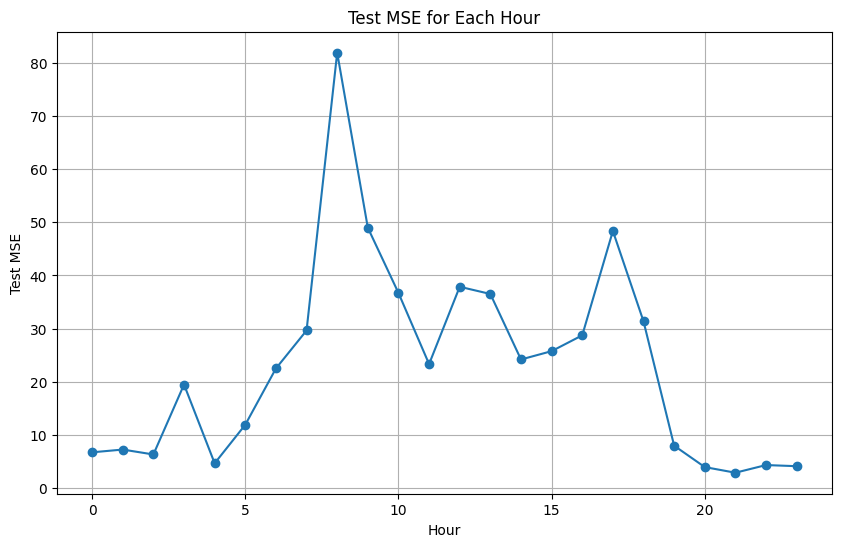

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the dataframe
def preprocess(df, lags):
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['DATE'])
    df['Hour'] = df['TIME'].str.split(':').str[0].astype(int)
    df['Power'] = df['(kW)']
    df = df.drop(columns=['TIME', '(kW)'])
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    df['DayOfYear'] = df['Date'].dt.dayofyear

    for lag in range(1, lags + 1):
        df[f'Lag{lag}'] = df['Power'].shift(lag)

    df = df.dropna()
    return df

# Number of lag features to create
num_lags = 2

# Read the data for the years 2021 to 2023
df_2021 = pd.read_csv('juyo_shikoku_2021.csv')
df_2022 = pd.read_csv('juyo_shikoku_2022.csv')
df_2023 = pd.read_csv('juyo_shikoku_2023.csv')

# Preprocess the data
df_2021 = preprocess(df_2021, num_lags)
df_2022 = preprocess(df_2022, num_lags)
df_2023 = preprocess(df_2023, num_lags)

# Features to be used for prediction
features = ['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, num_lags + 1)]

# Degrees of polynomial to evaluate
degrees = [1, 2, 3, 4, 5]

best_degree_per_hour = {}
test_mse_per_hour = []

for hour in range(24):
    hour_train_df = df_2021[df_2021['Hour'] == hour]
    hour_val_df = df_2022[df_2022['Hour'] == hour]
    hour_test_df = df_2023[df_2023['Hour'] == hour]

    if hour_train_df.empty or hour_val_df.empty or hour_test_df.empty:
        continue

    X_train = hour_train_df[features]
    y_train = hour_train_df['Power']

    X_val = hour_val_df[features]
    y_val = hour_val_df['Power']

    X_test = hour_test_df[features]
    y_test = hour_test_df['Power']

    best_val_mse = float('inf')
    best_degree = None

    for degree in degrees:
        # Transform features to polynomial
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly_features.fit_transform(X_train)
        X_val_poly = poly_features.transform(X_val)

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_val_poly)

        # Evaluate the model
        val_mse = mean_squared_error(y_val, y_val_pred)
        # print(f'Hour {hour}, Validation MSE for degree {degree}: {val_mse}')

        # Update the best degree if needed
        if val_mse < best_val_mse:
            best_val_mse = val_mse
            best_degree = degree

    # print(f'Hour {hour}: Best degree found: {best_degree}, Corresponding validation MSE: {best_val_mse}')

    best_degree_per_hour[hour] = best_degree

    # Retrain the model using the best degree
    poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
    X_train_val_poly = poly_features.fit_transform(pd.concat([X_train, X_val]))
    y_train_val = pd.concat([y_train, y_val])
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_val_poly, y_train_val)

    # Predict on test set
    y_test_pred = model.predict(X_test_poly)

    # Evaluate the model on test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = model.score(X_test_poly, y_test)
    test_mse_per_hour.append(test_mse)
    print(f'Hour {hour}, Test MSE with best degree {best_degree}: {test_mse}, Test RMSE: {test_rmse}, Test R^2: {test_r2}')

# Calculate and visualize mean MSE for each degree
mean_test_mse = np.mean(test_mse_per_hour)
print(f'Mean Test MSE: {mean_test_mse}')

# Visualize the test MSE per hour
plt.figure(figsize=(10, 6))
plt.plot(range(24), test_mse_per_hour, marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Test MSE')
plt.title('Test MSE for Each Hour')
plt.grid(True)
plt.show()


Hour 0: Best lag: 2, Best degree: 3, Validation MSE: 4.56173096196523
Hour 0, Test MSE with best lag 2 and degree 3: 5.906900769850021, Test RMSE: 2.4304116461723146, Test R^2: 0.9954593929075042
Hour 1: Best lag: 2, Best degree: 2, Validation MSE: 6.653858189037679
Hour 1, Test MSE with best lag 2 and degree 2: 5.2111420309348055, Test RMSE: 2.28279259481338, Test R^2: 0.9964947043826543
Hour 2: Best lag: 2, Best degree: 2, Validation MSE: 3.6868964052503346
Hour 2, Test MSE with best lag 2 and degree 2: 5.141374233957892, Test RMSE: 2.267459863803082, Test R^2: 0.9969902560168155
Hour 3: Best lag: 2, Best degree: 2, Validation MSE: 3.96262600855046
Hour 3, Test MSE with best lag 2 and degree 2: 4.485353937740542, Test RMSE: 2.117865420120113, Test R^2: 0.99710305827134
Hour 4: Best lag: 5, Best degree: 1, Validation MSE: 4.555420879431228
Hour 4, Test MSE with best lag 5 and degree 1: 4.7171921279295, Test RMSE: 2.1719097881655904, Test R^2: 0.9960396757623738
Hour 5: Best lag: 4, Be

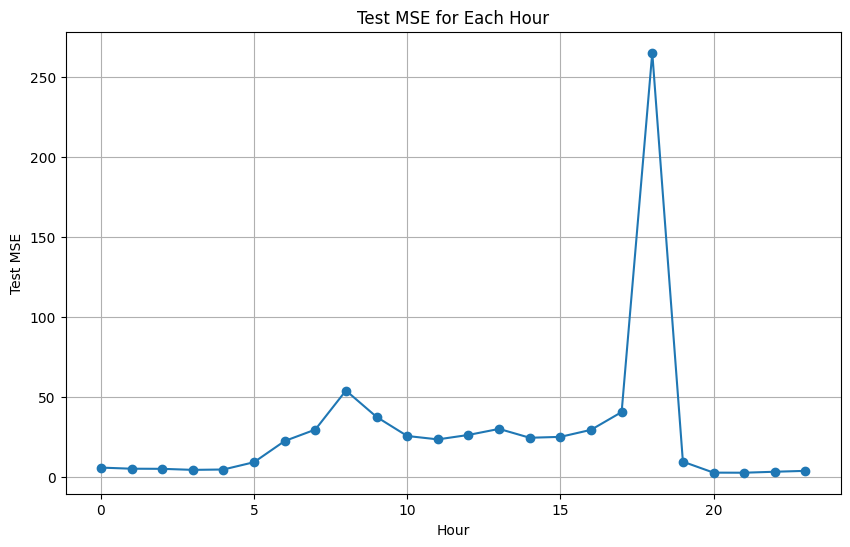

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the dataframe
def preprocess(df, lags):
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['DATE'])
    df['Hour'] = df['TIME'].str.split(':').str[0].astype(int)
    df['Power'] = df['(kW)']
    df = df.drop(columns=['TIME', '(kW)'])
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    df['DayOfYear'] = df['Date'].dt.dayofyear

    for lag in range(1, lags + 1):
        df[f'Lag{lag}'] = df['Power'].shift(lag)

    df = df.dropna()
    return df

# Define a range of potential lags and degrees to test
potential_lags = range(1, 6)
degrees = [1, 2, 3, 4, 5]

# Read the data for the years 2021 to 2023
df_2021 = pd.read_csv('juyo_shikoku_2021.csv')
df_2022 = pd.read_csv('juyo_shikoku_2022.csv')
df_2023 = pd.read_csv('juyo_shikoku_2023.csv')

# Initialize variables to store the best number of lags and its corresponding performance
best_lags_degrees_per_hour = {}
test_mse_per_hour = []

for hour in range(24):
    best_lag = None
    best_degree = None
    best_val_mse = float('inf')

    for num_lags in potential_lags:
        # Preprocess data for the current number of lags
        df_train = preprocess(df_2021, num_lags)
        df_val = preprocess(df_2022, num_lags)
        df_test = preprocess(df_2023, num_lags)

        hour_train_df = df_train[df_train['Hour'] == hour]
        hour_val_df = df_val[df_val['Hour'] == hour]
        hour_test_df = df_test[df_test['Hour'] == hour]

        if hour_train_df.empty or hour_val_df.empty or hour_test_df.empty:
            continue

        X_train = hour_train_df[['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, num_lags + 1)]]
        y_train = hour_train_df['Power']

        X_val = hour_val_df[['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, num_lags + 1)]]
        y_val = hour_val_df['Power']

        for degree in degrees:
            # Transform features to polynomial
            poly_features = PolynomialFeatures(degree=degree, include_bias=False)
            X_train_poly = poly_features.fit_transform(X_train)
            X_val_poly = poly_features.transform(X_val)

            # Fit polynomial regression model
            model = LinearRegression()
            model.fit(X_train_poly, y_train)

            # Predict on validation set
            y_val_pred = model.predict(X_val_poly)

            # Evaluate the model
            val_mse = mean_squared_error(y_val, y_val_pred)
            if val_mse < best_val_mse:
                best_val_mse = val_mse
                best_lag = num_lags
                best_degree = degree

    print(f'Hour {hour}: Best lag: {best_lag}, Best degree: {best_degree}, Validation MSE: {best_val_mse}')
    best_lags_degrees_per_hour[hour] = (best_lag, best_degree)

    # Now train with the best lag and degree on combined train and validation sets, and test on the test set
    df_train_val = preprocess(pd.concat([df_2021, df_2022]), best_lag)
    df_test = preprocess(df_2023, best_lag)

    hour_train_val_df = df_train_val[df_train_val['Hour'] == hour]
    hour_test_df = df_test[df_test['Hour'] == hour]

    if hour_train_val_df.empty or hour_test_df.empty:
        continue

    X_train_val = hour_train_val_df[['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, best_lag + 1)]]
    y_train_val = hour_train_val_df['Power']

    X_test = hour_test_df[['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, best_lag + 1)]]
    y_test = hour_test_df['Power']

    # Transform features to polynomial
    poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
    X_train_val_poly = poly_features.fit_transform(X_train_val)
    X_test_poly = poly_features.transform(X_test)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_val_poly, y_train_val)

    # Predict on test set
    y_test_pred = model.predict(X_test_poly)

    # Evaluate the model on test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = model.score(X_test_poly, y_test)
    test_mse_per_hour.append(test_mse)
    print(f'Hour {hour}, Test MSE with best lag {best_lag} and degree {best_degree}: {test_mse}, Test RMSE: {test_rmse}, Test R^2: {test_r2}')

# Calculate and visualize mean MSE for each hour
mean_test_mse = np.mean(test_mse_per_hour)
print(f'Mean Test MSE: {mean_test_mse}')

# Visualize the test MSE per hour
plt.figure(figsize=(10, 6))
plt.plot(range(24), test_mse_per_hour, marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Test MSE')
plt.title('Test MSE for Each Hour')
plt.grid(True)
plt.show()


Hour 0: Best lag: 5, Best degree: 2, Validation MSE: 24.853862922731594
Hour 0, Test MSE with best lag 5 and degree 2: 25.87739703015724, Test RMSE: 5.086983097097654, Test R^2: 0.9986862299672405
Hour 1: Best lag: 2, Best degree: 4, Validation MSE: 32.83480282248998
Hour 1, Test MSE with best lag 2 and degree 4: 46.956528204746924, Test RMSE: 6.852483360413721, Test R^2: 0.9979794744951047
Hour 2: Best lag: 4, Best degree: 3, Validation MSE: 18.729495536436982
Hour 2, Test MSE with best lag 4 and degree 3: 23.94484769866595, Test RMSE: 4.893347289807453, Test R^2: 0.9990487744201252
Hour 3: Best lag: 5, Best degree: 2, Validation MSE: 22.33178363838873
Hour 3, Test MSE with best lag 5 and degree 2: 23.58972243541103, Test RMSE: 4.856925203810641, Test R^2: 0.9990482302270474
Hour 4: Best lag: 5, Best degree: 3, Validation MSE: 39.544999333404235
Hour 4, Test MSE with best lag 5 and degree 3: 38.63341897318507, Test RMSE: 6.215578731959323, Test R^2: 0.9984602412041789
Hour 5: Best lag

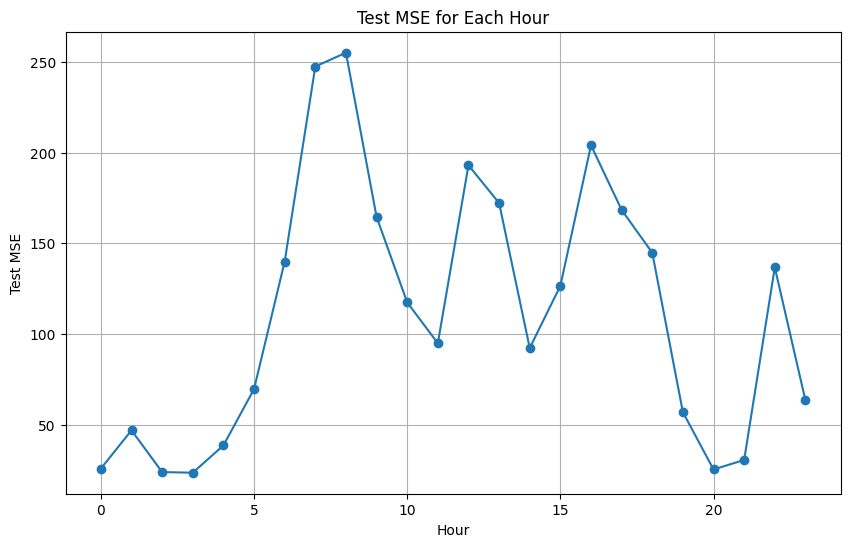

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the dataframe
def preprocess(df, lags):
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['DATE'])
    df['Hour'] = df['TIME'].str.split(':').str[0].astype(int)
    df['Power'] = df['(kW)']
    df = df.drop(columns=['TIME', '(kW)'])
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    df['DayOfYear'] = df['Date'].dt.dayofyear

    for lag in range(1, lags + 1):
        df[f'Lag{lag}'] = df['Power'].shift(lag)

    df = df.dropna()
    return df

# Define a range of potential lags and degrees to test
potential_lags = range(1, 6)
degrees = [1, 2, 3, 4, 5]

# Read the data for the years 2016 to 2022
df_2016 = pd.read_csv('juyo_2016_tohoku.csv')
df_2017 = pd.read_csv('juyo_2017_tohoku.csv')
df_2018 = pd.read_csv('juyo_2018_tohoku.csv')
df_2019 = pd.read_csv('juyo_2019_tohoku.csv')
df_2020 = pd.read_csv('juyo_2020_tohoku.csv')
df_2021 = pd.read_csv('juyo_2021_tohoku.csv')
df_2022 = pd.read_csv('juyo_2022_tohoku.csv')

# Initialize variables to store the best number of lags and its corresponding performance
best_lags_degrees_per_hour = {}
test_mse_per_hour = []

for hour in range(24):
    best_lag = None
    best_degree = None
    best_val_mse = float('inf')

    for num_lags in potential_lags:
        # Preprocess data for the current number of lags
        df_train = preprocess(pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020]), num_lags)
        df_val = preprocess(df_2021, num_lags)
        df_test = preprocess(df_2022, num_lags)

        hour_train_df = df_train[df_train['Hour'] == hour]
        hour_val_df = df_val[df_val['Hour'] == hour]
        hour_test_df = df_test[df_test['Hour'] == hour]

        if hour_train_df.empty or hour_val_df.empty or hour_test_df.empty:
            continue

        X_train = hour_train_df[['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, num_lags + 1)]]
        y_train = hour_train_df['Power']

        X_val = hour_val_df[['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, num_lags + 1)]]
        y_val = hour_val_df['Power']

        for degree in degrees:
            # Transform features to polynomial
            poly_features = PolynomialFeatures(degree=degree, include_bias=False)
            X_train_poly = poly_features.fit_transform(X_train)
            X_val_poly = poly_features.transform(X_val)

            # Fit polynomial regression model
            model = LinearRegression()
            model.fit(X_train_poly, y_train)

            # Predict on validation set
            y_val_pred = model.predict(X_val_poly)

            # Evaluate the model
            val_mse = mean_squared_error(y_val, y_val_pred)
            if val_mse < best_val_mse:
                best_val_mse = val_mse
                best_lag = num_lags
                best_degree = degree

    print(f'Hour {hour}: Best lag: {best_lag}, Best degree: {best_degree}, Validation MSE: {best_val_mse}')
    best_lags_degrees_per_hour[hour] = (best_lag, best_degree)

    # Now train with the best lag and degree on combined train and validation sets, and test on the test set
    df_train_val = preprocess(pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]), best_lag)
    df_test = preprocess(df_2022, best_lag)

    hour_train_val_df = df_train_val[df_train_val['Hour'] == hour]
    hour_test_df = df_test[df_test['Hour'] == hour]

    if hour_train_val_df.empty or hour_test_df.empty:
        continue

    X_train_val = hour_train_val_df[['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, best_lag + 1)]]
    y_train_val = hour_train_val_df['Power']

    X_test = hour_test_df[['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, best_lag + 1)]]
    y_test = hour_test_df['Power']

    # Transform features to polynomial
    poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
    X_train_val_poly = poly_features.fit_transform(X_train_val)
    X_test_poly = poly_features.transform(X_test)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_val_poly, y_train_val)

    # Predict on test set
    y_test_pred = model.predict(X_test_poly)

    # Evaluate the model on test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = model.score(X_test_poly, y_test)
    test_mse_per_hour.append(test_mse)
    print(f'Hour {hour}, Test MSE with best lag {best_lag} and degree {best_degree}: {test_mse}, Test RMSE: {test_rmse}, Test R^2: {test_r2}')

# Calculate and visualize mean MSE for each hour
mean_test_mse = np.mean(test_mse_per_hour)
print(f'Mean Test MSE: {mean_test_mse}')

# Visualize the test MSE per hour
plt.figure(figsize=(10, 6))
plt.plot(range(24), test_mse_per_hour, marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Test MSE')
plt.title('Test MSE for Each Hour')
plt.grid(True)
plt.show()


Hour 0: Best lag: 5, Best degree: 2, Validation MSE: 24.853862922731594
Hour 0, Test MSE with best lag 5 and degree 2: 25.87739703015724, Test RMSE: 5.086983097097654, Test R^2: 0.9986862299672405
Hour 1: Best lag: 2, Best degree: 4, Validation MSE: 32.83480282248998
Hour 1, Test MSE with best lag 2 and degree 4: 46.956528204746924, Test RMSE: 6.852483360413721, Test R^2: 0.9979794744951047
Hour 2: Best lag: 4, Best degree: 3, Validation MSE: 18.729495536436982
Hour 2, Test MSE with best lag 4 and degree 3: 23.94484769866595, Test RMSE: 4.893347289807453, Test R^2: 0.9990487744201252
Hour 3: Best lag: 5, Best degree: 2, Validation MSE: 22.33178363838873
Hour 3, Test MSE with best lag 5 and degree 2: 23.58972243541103, Test RMSE: 4.856925203810641, Test R^2: 0.9990482302270474
Hour 4: Best lag: 5, Best degree: 3, Validation MSE: 39.544999333404235
Hour 4, Test MSE with best lag 5 and degree 3: 38.63341897318507, Test RMSE: 6.215578731959323, Test R^2: 0.9984602412041789
Hour 5: Best lag

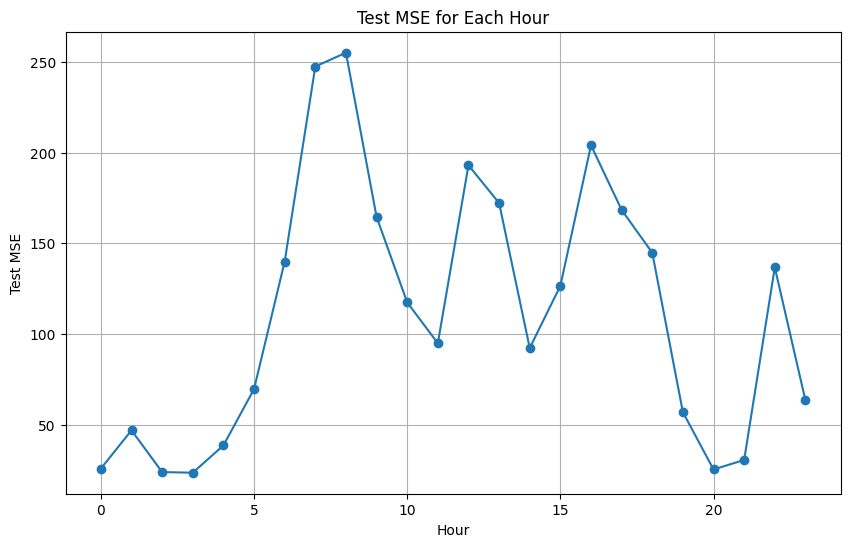

[ 982.05273183  940.69127041  969.72586483 1057.18266061 1099.0135307
 1114.52458706 1109.86297513 1036.05918445  952.08446722 1037.7389521
 1053.6341903  1124.95645937 1144.96845572 1111.68318453  996.24943803
  968.00732275 1131.3160691  1156.80431253 1117.09053574 1117.676206
 1090.84618892 1007.87495681  960.65976663 1045.50456331 1038.20856797
 1012.42891549 1061.61994896 1079.15387901 1048.26095447 1029.03275799
 1109.57395712 1073.40254682 1100.49197712 1115.31546385 1117.64019616
 1109.75927612 1084.80500639 1101.50599391 1065.67176743 1059.24455577
 1074.86286303 1035.0531424   968.61877282  952.01314938 1039.11931337
 1053.88963138 1090.07711315 1114.30516531 1048.57310044  987.29996693
 1056.59047857 1152.5463987  1184.68751593 1095.31237857 1078.92668503
 1007.88075973  900.55918682  940.32321508  980.79298578  934.76416085
  988.36875647  996.15662996 1001.52490003  939.79483908  975.64575853
  987.97848594  999.32445349  958.97019116  952.60751011  870.58384887
  837.7040

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def preprocess(df, lags):
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['DATE'])
    df['Hour'] = df['TIME'].str.split(':').str[0].astype(int)
    df['Power'] = df['(kW)']
    df = df.drop(columns=['TIME', '(kW)'])
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    df['DayOfYear'] = df['Date'].dt.dayofyear

    for lag in range(1, lags + 1):
        df[f'Lag{lag}'] = df['Power'].shift(lag)

    df = df.dropna()
    return df

def predict_next_year(file1, file2, file3, file4, file5, file6, file7):
    # Read the data for the years provided
    df_2016 = pd.read_csv(file1)
    df_2017 = pd.read_csv(file2)
    df_2018 = pd.read_csv(file3)
    df_2019 = pd.read_csv(file4)
    df_2020 = pd.read_csv(file5)
    df_2021 = pd.read_csv(file6)
    df_2022 = pd.read_csv(file7)

    # Define a range of potential lags and degrees to test
    potential_lags = range(1, 6)
    degrees = [1, 2, 3, 4, 5]

    best_lags_degrees_per_hour = {}
    test_mse_per_hour = []
    predictions_per_hour = {}

    for hour in range(24):
        best_lag = None
        best_degree = None
        best_val_mse = float('inf')

        for num_lags in potential_lags:
            # Preprocess data for the current number of lags
            df_train = preprocess(pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020]), num_lags)
            df_val = preprocess(df_2021, num_lags)
            df_test = preprocess(df_2022, num_lags)

            hour_train_df = df_train[df_train['Hour'] == hour]
            hour_val_df = df_val[df_val['Hour'] == hour]
            hour_test_df = df_test[df_test['Hour'] == hour]

            if hour_train_df.empty or hour_val_df.empty or hour_test_df.empty:
                continue

            X_train = hour_train_df[['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, num_lags + 1)]]
            y_train = hour_train_df['Power']

            X_val = hour_val_df[['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, num_lags + 1)]]
            y_val = hour_val_df['Power']

            for degree in degrees:
                # Transform features to polynomial
                poly_features = PolynomialFeatures(degree=degree, include_bias=False)
                X_train_poly = poly_features.fit_transform(X_train)
                X_val_poly = poly_features.transform(X_val)

                # Fit polynomial regression model
                model = LinearRegression()
                model.fit(X_train_poly, y_train)

                # Predict on validation set
                y_val_pred = model.predict(X_val_poly)

                # Evaluate the model
                val_mse = mean_squared_error(y_val, y_val_pred)
                if val_mse < best_val_mse:
                    best_val_mse = val_mse
                    best_lag = num_lags
                    best_degree = degree

        print(f'Hour {hour}: Best lag: {best_lag}, Best degree: {best_degree}, Validation MSE: {best_val_mse}')
        best_lags_degrees_per_hour[hour] = (best_lag, best_degree)

        # Now train with the best lag and degree on combined train and validation sets, and test on the test set
        df_train_val = preprocess(pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]), best_lag)
        df_test = preprocess(df_2022, best_lag)

        hour_train_val_df = df_train_val[df_train_val['Hour'] == hour]
        hour_test_df = df_test[df_test['Hour'] == hour]

        if hour_train_val_df.empty or hour_test_df.empty:
            continue

        X_train_val = hour_train_val_df[['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, best_lag + 1)]]
        y_train_val = hour_train_val_df['Power']

        X_test = hour_test_df[['Hour', 'DayOfWeek', 'Month', 'DayOfYear'] + [f'Lag{lag}' for lag in range(1, best_lag + 1)]]
        y_test = hour_test_df['Power']

        # Transform features to polynomial
        poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
        X_train_val_poly = poly_features.fit_transform(X_train_val)
        X_test_poly = poly_features.transform(X_test)

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(X_train_val_poly, y_train_val)

        # Predict on test set
        y_test_pred = model.predict(X_test_poly)

        # Store predictions
        predictions_per_hour[hour] = y_test_pred

        # Evaluate the model on test set
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = model.score(X_test_poly, y_test)
        test_mse_per_hour.append(test_mse)
        print(f'Hour {hour}, Test MSE with best lag {best_lag} and degree {best_degree}: {test_mse}, Test RMSE: {test_rmse}, Test R^2: {test_r2}')

    # Calculate and visualize mean MSE for each hour
    mean_test_mse = np.mean(test_mse_per_hour)
    print(f'Mean Test MSE: {mean_test_mse}')

    # Visualize the test MSE per hour
    plt.figure(figsize=(10, 6))
    plt.plot(range(24), test_mse_per_hour, marker='o', linestyle='-')
    plt.xlabel('Hour')
    plt.ylabel('Test MSE')
    plt.title('Test MSE for Each Hour')
    plt.grid(True)
    plt.show()

    return predictions_per_hour

# Example usage:
predictions = predict_next_year('juyo_2016_tohoku.csv', 'juyo_2017_tohoku.csv', 'juyo_2018_tohoku.csv', 'juyo_2019_tohoku.csv', 'juyo_2020_tohoku.csv', 'juyo_2021_tohoku.csv', 'juyo_2022_tohoku.csv')



In [ ]:
# Extract the last day (24 hours) of actual and predicted data for visualization
last_day_date = df_test['Date'].max()
last_day_df = df_test[df_test['Date'] == last_day_date]

actual_last_day = []
predicted_last_day = []

for hour in range(24):
    if hour in predictions_per_hour:
        hour_test_df = last_day_df[last_day_df['Hour'] == hour]
        if not hour_test_df.empty:
            actual_last_day.extend(hour_test_df['Power'].values)
            predicted_last_day.extend(predictions_per_hour[hour][:len(hour_test_df)])

# Convert lists to numpy arrays for plotting
actual_last_day = np.array(actual_last_day)
predicted_last_day = np.array(predicted_last_day)

# Plotting the actual vs predicted values for the last day
plt.figure(figsize=(14, 7))
plt.plot(range(24), actual_last_day, label='Actual', color='b', marker='o')
plt.plot(range(24), predicted_last_day, label='Predicted', color='r', marker='x')
plt.xlabel('Hour')
plt.ylabel('Power (kW)')
plt.title('Actual vs Predicted Power Usage for the Last Day')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'df_test' is not defined